**Importing Libraries**

In [19]:
import imblearn
import numpy as np
import pandas as pd
import random
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

**Importing dataset, cleaning and normalizing it**

In [20]:
# Importing the data-set
credit_data = pd.read_csv('creditcard.csv')

# Splitting data into labels and features
features, labels = credit_data.iloc[:, :-1], credit_data.iloc[:, [-1]]

# Replace mean missing values with mean of that column
mean_values = features.mean()
features.fillna(mean_values, inplace=True)

# Replacing NAN cells of labels with a random number between 0 and 1
labels.fillna(random.randint(0, 1), inplace=True)

# Normalizing the features using z-score normalization
features = (features - features.mean()) / features.std()

C:\Users\M.M.Hashir\AppData\Local\Temp\ipykernel_18336\2473562101.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels.fillna(random.randint(0, 1), inplace=True)


**Checking Data Before Applying SMOTE**

In [21]:
print(labels)

        Class
0           0
1           0
2           0
3           0
4           0
...       ...
284802      0
284803      0
284804      0
284805      0
284806      0

[284807 rows x 1 columns]


**Applying SMOTE to the data**

In [5]:
# Splitting the data into train-test split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Applying SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [6]:
# Checking if resampling worked
print(y_train_resampled)

        Class
0           0
1           0
2           0
3           0
4           0
...       ...
454897      1
454898      1
454899      1
454900      1
454901      1

[454902 rows x 1 columns]


**Applying Logistic Regression to the data**

In [7]:
# Create the model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train_resampled, y_train_resampled)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

**Precision, Recall, and Accuracy for Logistic Regression**

In [8]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the precision, recall-score and accuracy
precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Evaluate the model
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.9746
Precision: 0.0588
Recall: 0.9184


**Confusion Matrix of Logistic Regression**

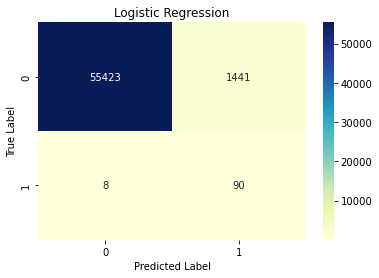

In [9]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='YlGnBu')

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Logistic Regression')

# Show the plot
plt.show()


**Classification using Naive Bayes with Bernoulli Distribution**

In [10]:
# Create the model
model_nb = BernoulliNB()

# Train the model on the training data
model_nb.fit(X_train_resampled, y_train_resampled)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB()

**Precision, Recall, and Accuracy of Naive Bayes**

In [11]:
# Make predictions on the test data
y_pred_nb = model_nb.predict(X_test)

# Calculate the precision, recall-score and accuracy
precision = precision_score(y_test, y_pred_nb)
accuracy = accuracy_score(y_test, y_pred_nb)
recall = recall_score(y_test, y_pred_nb)

# Evaluate the model
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.9924
Precision: 0.1633
Recall: 0.8265


**Confusion Matrix for Naive Bayes**

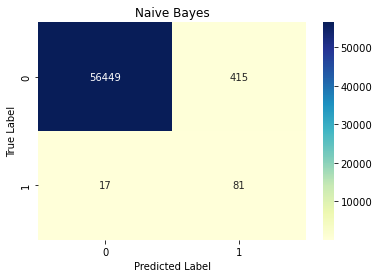

In [12]:
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='YlGnBu')

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Naive Bayes')

# Show the plot
plt.show()


**Classification using Random Forest with 30 Decision Trees**

In [13]:
# Create the model
model_rf = RandomForestClassifier(n_estimators=30)

# Train the model on the training data
model_rf.fit(X_train_resampled, y_train_resampled)

C:\Users\M.M.Hashir\AppData\Local\Temp\ipykernel_18336\2279231915.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(n_estimators=30)

**Precision, Recall, and Accuracy of Random Forest**

In [14]:
# Make predictions on the test data
y_pred_rf = model_rf.predict(X_test)

# Calculate the precision, recall-score and accuracy
precision = precision_score(y_test, y_pred_rf)
accuracy = accuracy_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)

# Evaluate the model
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.9996
Precision: 0.9111
Recall: 0.8367


**Confusion Matrix for Random Forest**

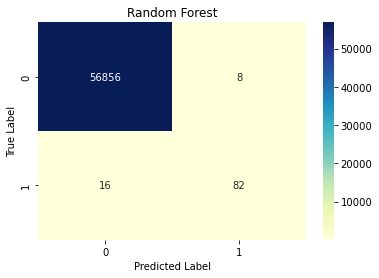

In [15]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='YlGnBu')

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest')

# Show the plot
plt.show()


**Classification using Multi-layer (4-layers) Perceptron**

In [16]:
# Create the model
model_mlp = MLPClassifier(hidden_layer_sizes=(50, 30, 30, 50), activation="relu", solver="adam")

# Train the model on the training data
model_mlp.fit(X_train_resampled, y_train_resampled)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(hidden_layer_sizes=(50, 30, 30, 50))

**Precision, Recall, and Accuracy of MLP**

In [22]:
# Make predictions on the test data
y_pred_mlp = model_mlp.predict(X_test)

# Calculate the precision, recall-score and accuracy
precision = precision_score(y_test, y_pred_mlp)
accuracy = accuracy_score(y_test, y_pred_mlp)
recall = recall_score(y_test, y_pred_mlp)

# Evaluate the model
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.9994
Precision: 0.8081
Recall: 0.8163


**Confusion Matrix for MLP**

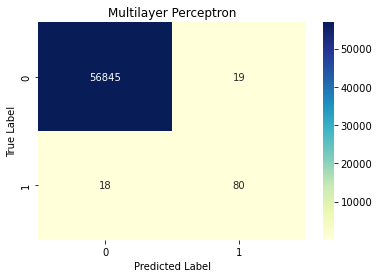

In [18]:
sns.heatmap(confusion_matrix(y_test, y_pred_mlp), annot=True, fmt='d', cmap='YlGnBu')

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Multilayer Perceptron')

# Show the plot
plt.show()
